In [39]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import figure, cm
%matplotlib inline

In [40]:
import algorithms.stepSizeAlgorithms as algos
from algorithms.gradientDescent import gradient_descent
from oracle.testOracles.oracle1 import Oracle1
from oracle.testOracles.oracle2 import Oracle2
from oracle.testOracles.oracle3 import Oracle3
from oracle.testOracles.oracle4 import Oracle4
from algorithms.fletcherReevesAlgorithm.fletcherReeves import fletcher_reeves

In [41]:
def visualize(oracle, x1_limit, x2_limit, steps, title):
    x1_min, x1_max = x1_limit
    x2_min, x2_max = x2_limit
    steps = np.array(steps)

    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max + 0.05, 0.05), np.arange(x2_min, x2_max + 0.05, 0.05))
    y = oracle.function([x1, x2])

    plt.figure()
    figure(figsize=(15, 10))

    plt.xlim(x1_limit)
    plt.ylim(x2_limit)

    plt.contour(
        x1, x2, y, extent=[x1_min, x1_max, x2_min, x2_max], cmap=cm.jet, origin='lower',
                levels = 25)

    plt.colorbar()
    plt.plot()

    plt.plot(steps[:,0], steps[:,1], marker='.', markersize=3, color="black")
    plt.title(title , fontsize=18)

In [42]:
o1 = Oracle1()
o2 = Oracle2()
o3 = Oracle3()
o4 = Oracle4()
t1 = algos.ConstStep()
t2 = algos.SplittingStep(0.3)
t3 = algos.GoldenRatioStep()
t4 = algos.FibonacciStep()

### Небольшая инструкция:
1) делаете новые оракулы со своими функциями
2) выполняете метод оптимизации и достаете массив с шагами работы
3) visualize() с шагами, с границами рисования по x и y и с заголовком

*по поводу того какие параметры у градиентного спуска че означают - спрашивайте*

### Функция $f_1(x, y)$
$f_1(x, y) = 2x^2 + xy + y$
### Промежуток:
$[-5, 5]$ для $x$ и $y$

<Figure size 432x288 with 0 Axes>

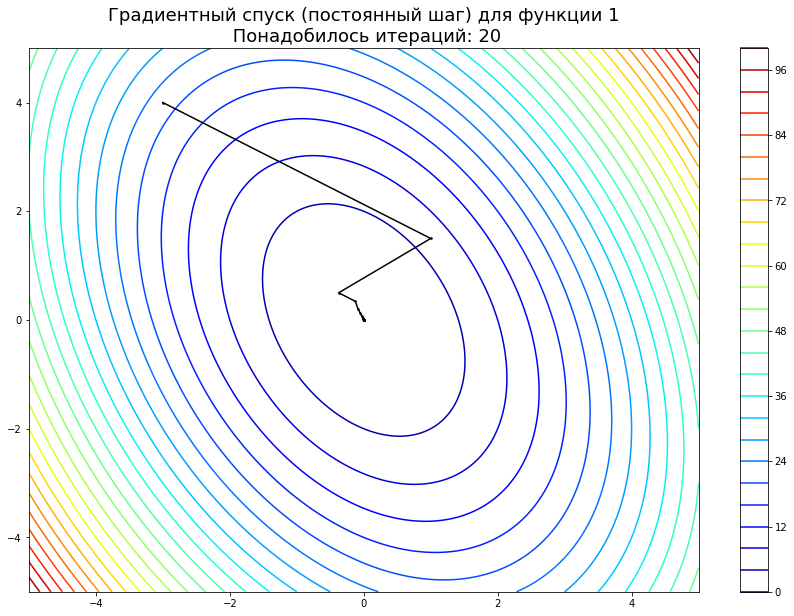

In [43]:
res = gradient_descent(o1, np.array([-3, 4]), t1, 0.0001, max_iter=1000, max_alpha=1, exit_clause="argument")[1]
visualize(o1, (-5, 5), (-5, 5), res, "Градиентный спуск (постоянный шаг) для функции 1\n Понадобилось итераций: " + str(len(res)))

<Figure size 432x288 with 0 Axes>

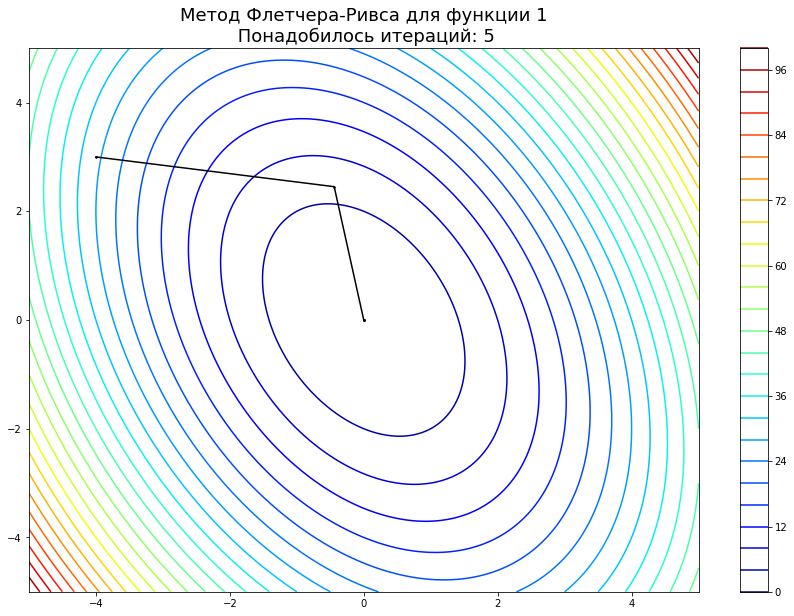

In [44]:
res = fletcher_reeves(o1, np.array([-4, 3]), t3, 0.00001, 0.00015, 10, 10)[1]
visualize(o1, (-5, 5), (-5, 5), res, "Метод Флетчера-Ривса для функции 1\n Понадобилось итераций: " + str(len(res)))

### Функция $f_2(x, y)$
$f_2(x, y) = x \cdot \exp(-(x^2 + y^2))$
### Промежуток:
$[-2, 2]$ для $x$ и $y$

<Figure size 432x288 with 0 Axes>

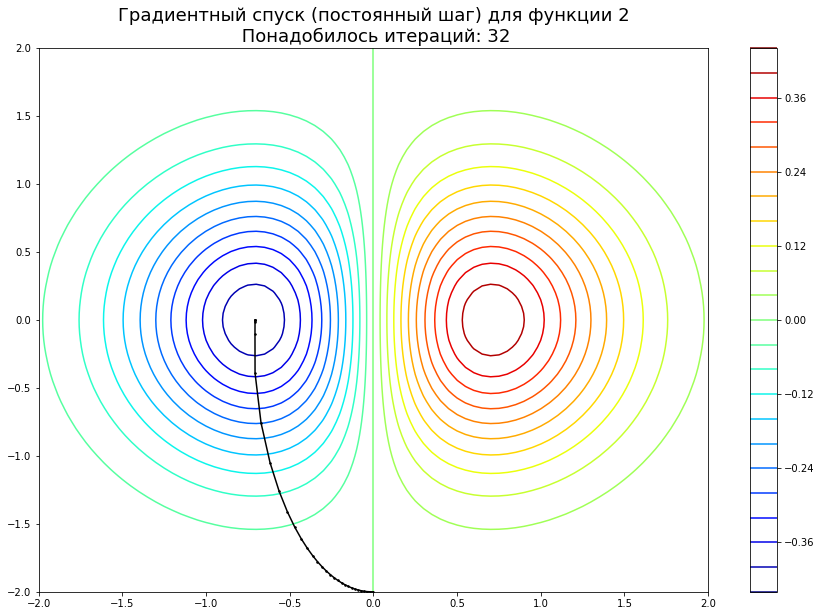

In [45]:
res = gradient_descent(o2, np.array([0, -2]), t1, 0.0001, max_iter=1000, max_alpha=1, exit_clause="argument")[1]
visualize(o2, (-2, 2), (-2, 2), res, "Градиентный спуск (постоянный шаг) для функции 2\n Понадобилось итераций: " + str(len(res)))


<Figure size 432x288 with 0 Axes>

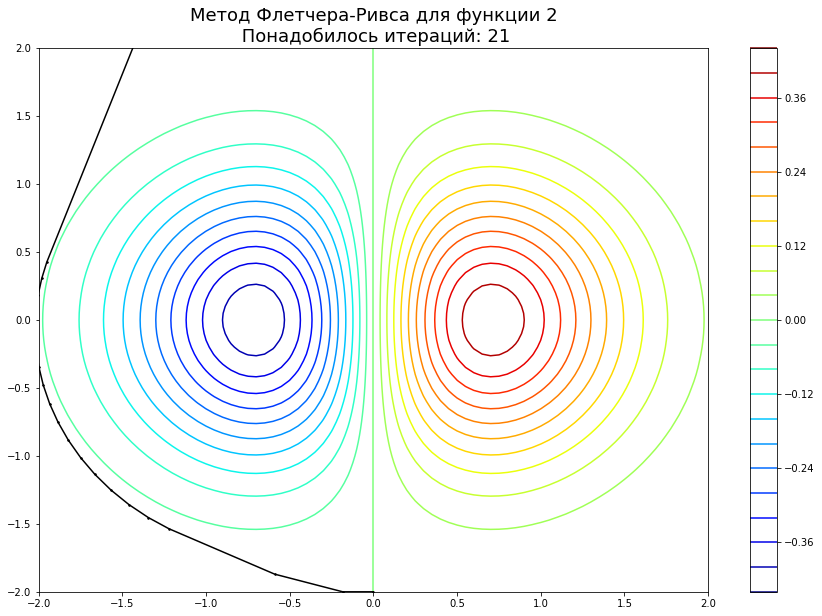

In [46]:
res = fletcher_reeves(o2, np.array([0, -2]), t3, 0.00001, 0.00015, 20, 10)[1]
visualize(o2, (-2, 2), (-2, 2), res, "Метод Флетчера-Ривса для функции 2\n Понадобилось итераций: " + str(len(res)))

### Функция $f_3(x, y)$
$f_3(x, y) = x^2 +(x-1)(y-2)+5(y+1)^2$
### Промежуток:
$[-5, 5]$ для $x$ и $y$

<Figure size 432x288 with 0 Axes>

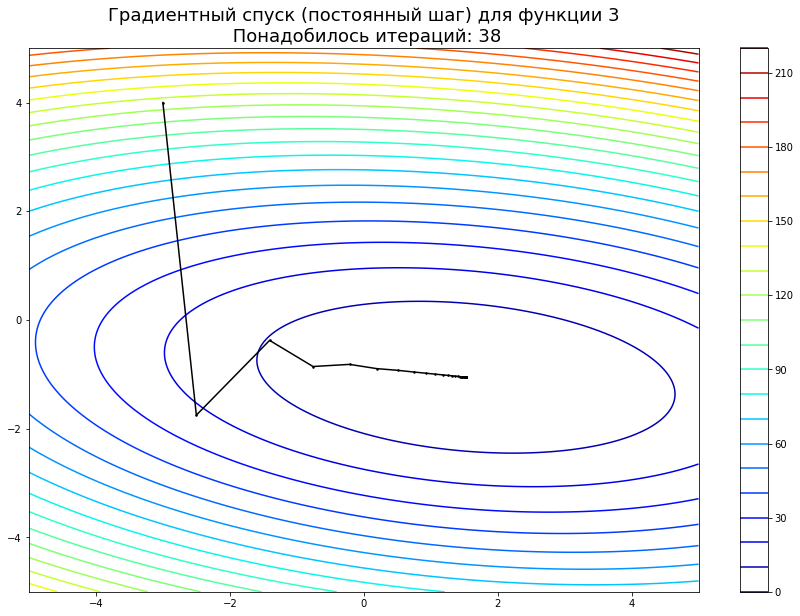

In [47]:
res = gradient_descent(o3, np.array([-3, 4]), t1, 0.0001, max_iter=1000, max_alpha=1, exit_clause="argument")[1]
visualize(o3, (-5, 5), (-5, 5), res, "Градиентный спуск (постоянный шаг) для функции 3\n Понадобилось итераций: " + str(len(res)))

<Figure size 432x288 with 0 Axes>

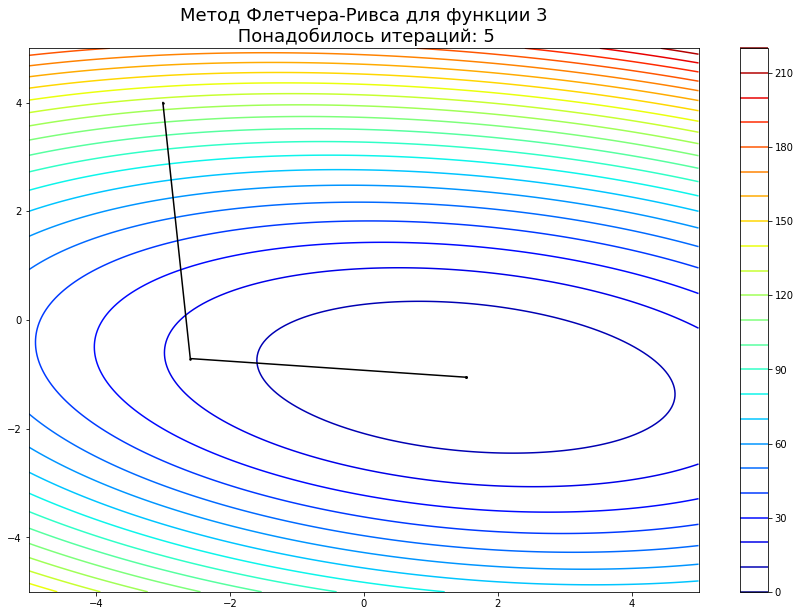

In [48]:
res = fletcher_reeves(o3, np.array([-3, 4]), t3, 0.00001, 0.00015, 20, 10)[1]
visualize(o3, (-5, 5), (-5, 5), res, "Метод Флетчера-Ривса для функции 3\n Понадобилось итераций: " + str(len(res)))


### Функция $f_4(x, y)$
$f_4(x, y) = x^2+x(y+4)+5(y-3)^2$
### Промежуток:
$[-4, -2]$ для $x$ и $[3, 5]$ для $y$

<Figure size 432x288 with 0 Axes>

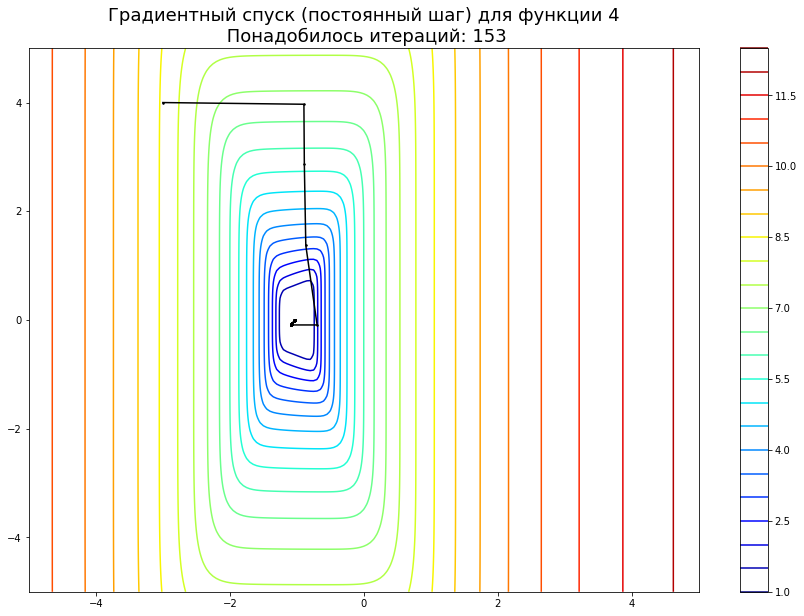

In [49]:
res = gradient_descent(o4, np.array([-3, 4]), t1, 0.0001, max_iter=1000, max_alpha=10, exit_clause="argument")[1]
visualize(o4, (-5, 5), (-5, 5), res, "Градиентный спуск (постоянный шаг) для функции 4\n Понадобилось итераций: " + str(len(res)))

<Figure size 432x288 with 0 Axes>

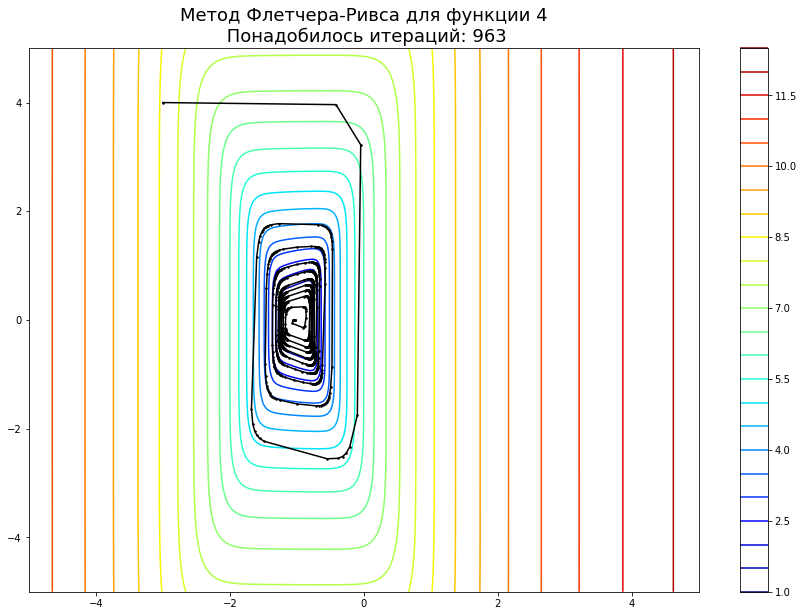

In [50]:
res = fletcher_reeves(o4, np.array([-3, 4]), t3, 0.00001, 0.00015, 1000, 10)[1]
visualize(o4, (-5, 5), (-5, 5), res, "Метод Флетчера-Ривса для функции 4\n Понадобилось итераций: " + str(len(res)))
